1.0


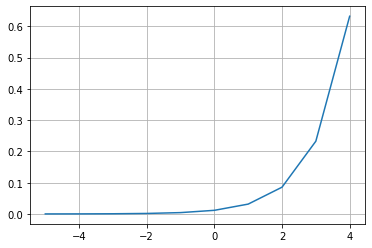

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

# Data for plotting
t = np.arange(-5.0, 5.0, 1)
#s = t>0                              # Step
#s = t                                # Linear
#s = 1/(1+np.exp(-t))                 # Sigmoid
#ds = s*(1-s)                         # Derivative of the sigmoid
#s = np.tanh(t)                       # Tanh
#ds = 1-s**2                          # Derivative of tanh
#s = np.maximum(0,t)                  # ReLU
#ds = s>0                             # Derivative of the ReLU
#alpha = 0.1                          # Parameter for the Leaky ReLU
#s = np.maximum(alpha*t,t)            # Leaky ReLU
#ds = (s<0)*alpha+(s>=0)              # Derivative of the Leaky ReLU
#a = 1                                # Parameter for the ELU
#s = (t<0)*a*(np.exp(t)-1)+(t>=0)*t   # ELU
#ds = (t<0)*(s+a)+(t>=0)              # Derivative of the ELU
#s = t/(1+np.exp(-t))                 # Swish
s = np.exp(t)/np.sum(np.exp(t))      # Softmax
print(sum(s))                        # Softmax probabilities sum to 1

fig, ax = plt.subplots()
ax.plot(t, s)
#ax.plot(t,ds,'r')

ax.grid()

plt.show()

In [ ]:
s

array([7.80134161e-05, 2.12062451e-04, 5.76445508e-04, 1.56694135e-03,
       4.25938820e-03, 1.15782175e-02, 3.14728583e-02, 8.55520989e-02,
       2.32554716e-01, 6.32149258e-01])

**Step function** 

*Cons*

* It cannot provide multi-value outputs—for example, it cannot be used for multiclass
classification problems.
* The gradient of the step function is zero, which causes a hindrance in the
backpropagation process.

**Linear**

*Cons*

* It’s not possible to use backpropagation as the derivative of the function is a
constant and has no relation to the input x.
* All layers of the neural network will collapse into one if a linear activation
function is used. No matter the number of layers in the neural network, the last
layer will still be a linear function of the first layer. So, essentially, a linear
activation function turns the neural network into just one layer.

**Sigmoid**

*Pros*

* It is commonly used for models where we have to predict the probability as an
output. Since probability of anything exists only between the range of 0 and 1,
sigmoid is the right choice because of its range.
* The function is differentiable and provides a smooth gradient, i.e., preventing
jumps in output values. This is represented by an S-shape of the sigmoid activation function.

*Cons*

* As we can see from the Figure, the gradient values are only significant for
range -3 to 3, and the graph gets much flatter in other regions.
It implies that for values greater than 3 or less than -3, the function will have very
small gradients. As the gradient value approaches zero, the network ceases to learn
and suffers from the *Vanishing gradient problem*.
* The output of the logistic function is not symmetric around zero. This makes the training of the
neural network more difficult and unstable.

**Tanh**

*Pros*

* The output of the tanh activation function is Zero centered; hence we can
easily map the output values as strongly negative, neutral, or strongly positive.
* Usually used in hidden layers of a neural network as its values lie between -1 and 1; therefore, the mean for the hidden layer comes out to be 0 or very close to
it. It helps in centering the data and makes learning for the next layer much
easier.

*Cons*

* Also tanh faces the problem of *vanishing gradients* similar to the
sigmoid activation function. Plus the gradient of the tanh function is much steeper as
compared to the sigmoid function.
Although both sigmoid and tanh face vanishing gradient issue, tanh is
zero centered.
Therefore, in practice, tanh nonlinearity is always preferred to sigmoid
nonlinearity.

**ReLU**

*Pros*

* Since only a certain number of neurons are activated, the ReLU function is far
more computationally efficient when compared to the sigmoid and tanh
functions.
* ReLU accelerates the convergence of gradient descent towards the global
minimum of the loss function due to its linear, non-saturating property.

*Cons*

* The negative side of the graph makes the gradient value zero. Due to this reason,
during the backpropagation process, the weights and biases for some neurons are
not updated. This can create dead neurons which never get activated.
All the negative input values become zero immediately, which decreases the
model’s ability to fit or train from the data properly.

**Leaky ReLU**

*Pros*

* The advantages of Leaky ReLU are same as that of ReLU, in addition to the fact that
it does enable backpropagation, even for negative input values.
By making this minor modification for negative input values, the gradient of the left
side of the graph comes out to be a non-zero value. Therefore, we would no longer
encounter dead neurons in that region.

*Cons*

* The predictions may not be consistent for negative input values.
* The gradient for negative values is a small value that makes the learning of
model parameters time-consuming.

**ELU (Exponential Linear Unit)**

*Pros*

* ELU becomes smooth slowly until its output equal to $a$ whereas RELU sharply smoothes.
* Avoids dead ReLU problem by introducing log curve for negative values of
input. It helps the network nudge weights and biases in the right direction.

*Cons*

* It increases the computational time because of the exponential operation
included
* No learning of the $a$ value takes place
* Exploding gradient problem

**Swish**

*Pros*
* Swish is a smooth function that means that it does not abruptly change
direction like ReLU does near x = 0. Rather, it smoothly bends from 0 towards
values $< 0$ and then upwards again.
* Small negative values were zeroed out in ReLU activation function. However,
those negative values may still be relevant for capturing patterns underlying
the data. Large negative values are zeroed out for reasons of sparsity making it a win-win situation.

**Softmax**

*Pros*

* It calculates the relative probabilities. Similar to the sigmoid/logistic activation
function, the SoftMax function returns the probability of each class.
It is most commonly used as an activation function for the last layer of the neural
network in the case of multi-class classification.

